In [75]:
import numpy
import random
from pandas import DataFrame
from typing import List
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plotter

#shift + enter : to run the cell (choose the one first)

In [76]:
def generate_uniform_dataset(n_data_points = 100,
                             feature_range: int = 1.0,
                             random_state: int = None):
    if random_state is None :
        random_state = int(random.random() * 100)
    return numpy.random.RandomState(random_state).uniform(0,
                                                          feature_range,
                                                          size=(n_data_points, 2))

In [77]:
def generate_blobbed_dataset(n_data_points=100,
                             feature_range: int= 1.0,
                             n_blobs : int = 3,
                             blob_std: float = None,
                             blob_centers: List[List[float]] = None,
                             size_blobs: List[int] = None,
                             random_state: int = None):
    if random_state is None :
        random_state = int(random.random() * 100)
    if blob_std is None :
        random.random()* 0.2 * feature_range
    if blob_centers is None :
        blob_centers = [[random.random() * feature_range,
                         random.random() * feature_range] for x in range(n_blobs)]
    if size_blobs is None :
        size_blobs = [int(random.random() * 10) for x in range(n_blobs)]

    blob_samples = []

    for blob_counter in range(len(size_blobs)):
        blob_samples.append(n_data_points * size_blobs[blob_counter] // sum(size_blobs))
    return make_blobs(n_samples=blob_samples,
                      cluster_std=blob_std,
                      centers=blob_centers,
                      random_state=random_state)[0]

In [78]:
# generating data
data_points = 200

In [79]:
uniform_dataset = DataFrame(data = generate_uniform_dataset(data_points),
                            columns = ['X','Y'])
blobbed_dataset = DataFrame(data = generate_blobbed_dataset(n_data_points = data_points,
                                                            n_blobs = 4,
                                                            blob_std = 0.1,
                                                            blob_centers = [[0.7, 0.2],
                                                                            [0.2, 0.1],
                                                                            [0.3, 0.8],
                                                                            [0.9, 0.9]],
                                                            size_blobs = [2,
                                                                      3,
                                                                      5,
                                                                      7]),
                            columns = ['X','Y'])

In [80]:
print(uniform_dataset)

            X         Y
0    0.834842  0.104796
1    0.744640  0.360501
2    0.359311  0.609238
3    0.393780  0.409073
4    0.509902  0.710148
..        ...       ...
195  0.969544  0.755249
196  0.175615  0.074842
197  0.894004  0.669377
198  0.028128  0.829139
199  0.107882  0.847908

[200 rows x 2 columns]


In [81]:
print(blobbed_dataset)

            X         Y
0    0.752899  0.932116
1    0.778459  0.923496
2    0.777841  0.845890
3    0.678311  0.840083
4    0.304366  0.859680
..        ...       ...
193  0.320167  0.717075
194  0.932219  0.829053
195  0.847702  0.967425
196  0.591145  0.202369
197  0.231157  0.053294

[198 rows x 2 columns]


In [82]:
number_of_cluster = 2
data_in = blobbed_dataset

In [83]:
model_kmeans = KMeans(number_of_cluster)
model_kmeans.fit(data_in)
clust_labels = model_kmeans.predict(data_in)
cent = model_kmeans.cluster_centers_
kmeans = DataFrame(clust_labels)
data_in.insert((data_in.shape[1]),'kmeans',kmeans)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


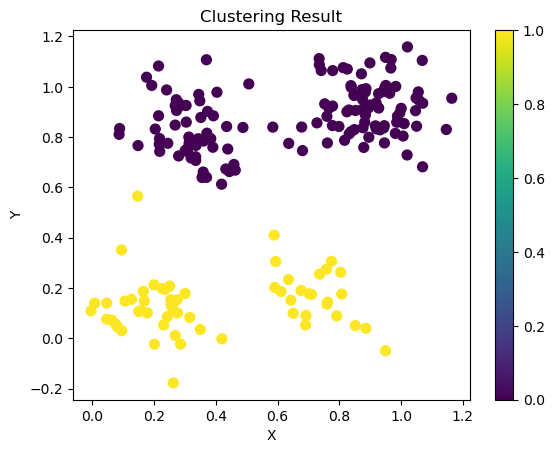

In [84]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in['X'], data_in['Y'],
                     c = kmeans[0], s = 50)
ax.set_title('Clustering Result')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

In [86]:
number_of_clusters_agg = 4
data_in_agg = blobbed_dataset

In [88]:
model_agg = AgglomerativeClustering(n_clusters = number_of_clusters_agg, metric = 'euclidean', linkage= 'ward')
clust_labels_agg = model_agg.fit_predict(data_in_agg)

agglomerative = DataFrame(clust_labels_agg)
data_in_agg.insert((data_in_agg.shape[1]), 'agglomerative', agglomerative)